In [12]:
from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(storage={'root_dir': 'trump_images'})
google_crawler.crawl(keyword='Donald Trump', max_num=20, min_size=(200, 200), max_size=None)

https://vk.com/@pylounge-obnaruzhenie-chert-lica-s-pomoschu-python

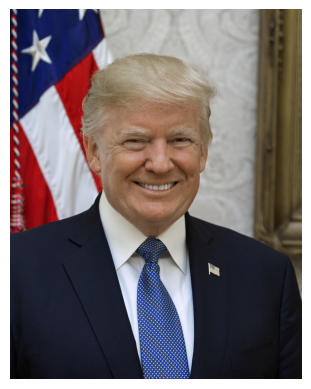

In [2]:
import cv2
import matplotlib.pyplot as plt

image_path = 'trump_images/000001.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

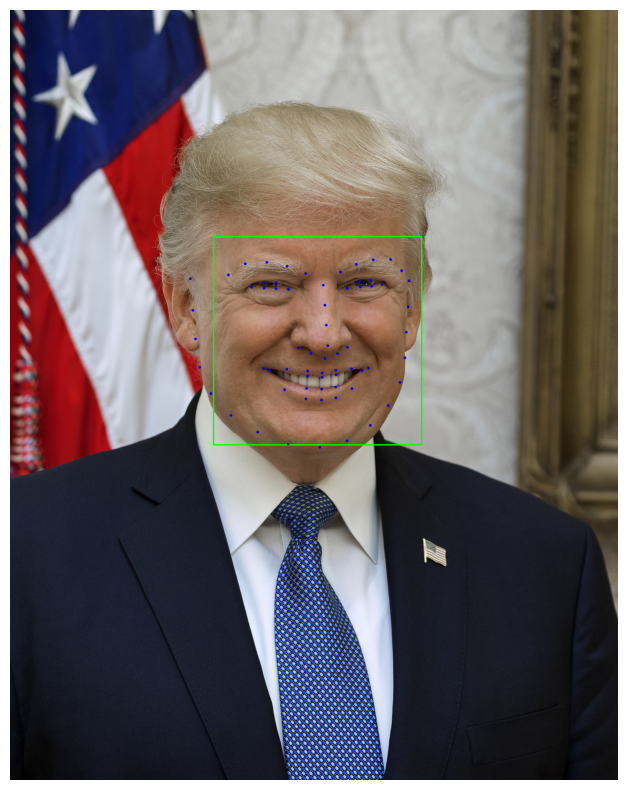

In [4]:
import cv2
import dlib
import matplotlib.pyplot as plt

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

image_path = 'trump_images/000001.jpg'
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Image not loaded. Check the file path and try again.")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = detector(gray)
for face in faces:
    x1 = face.left()
    y1 = face.top()  
    x2 = face.right() 
    y2 = face.bottom()
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 4)

    landmarks = predictor(gray, face)
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        cv2.circle(image, (x, y), 5, (255, 0, 0), -1) 

plt.figure(figsize=(10, 10))  
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()


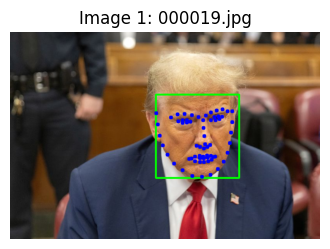

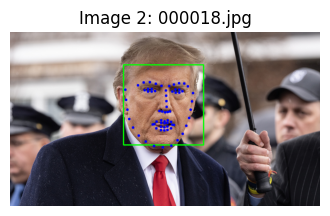

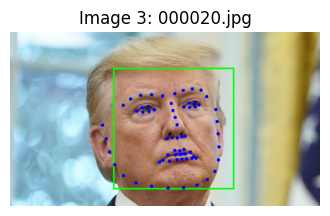

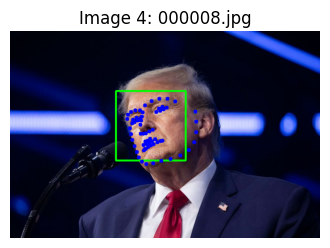

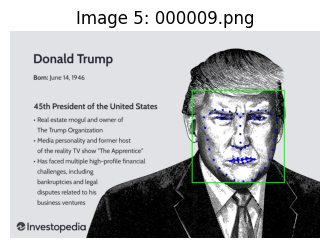

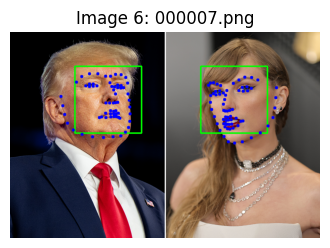

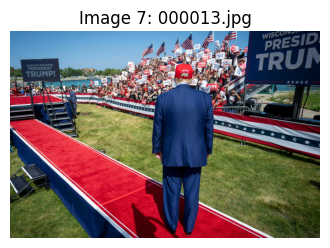

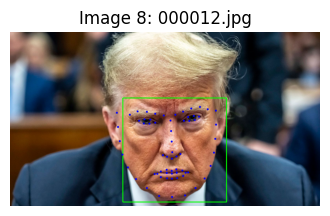

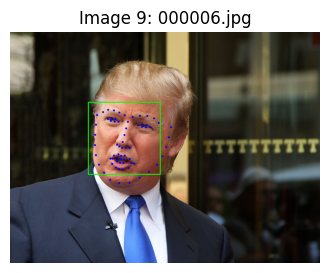

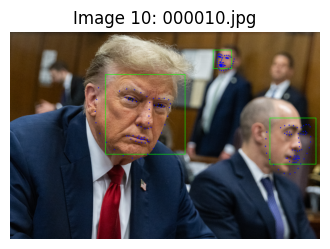

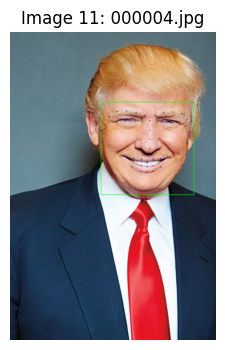

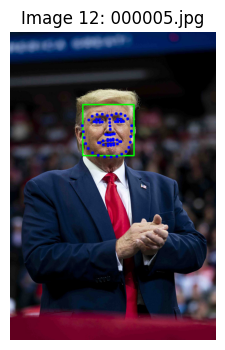

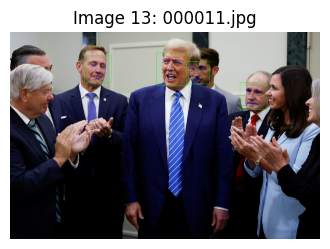

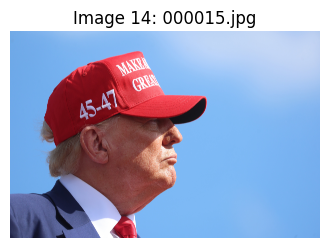

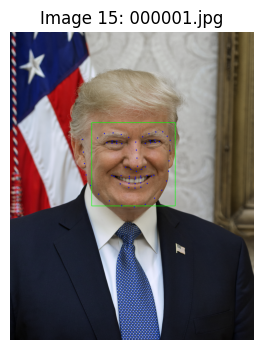

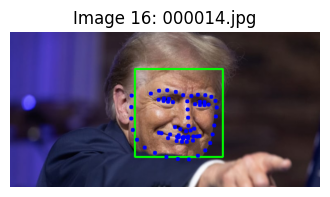

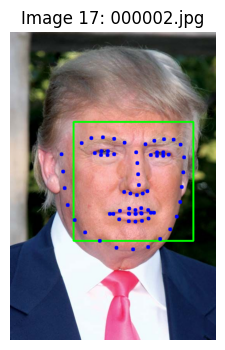

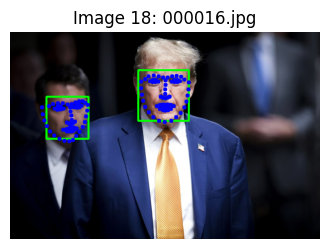

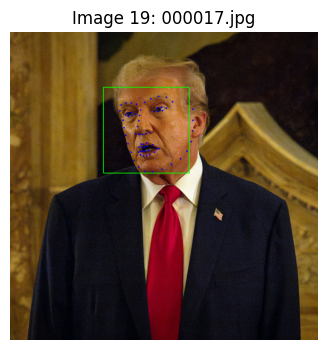

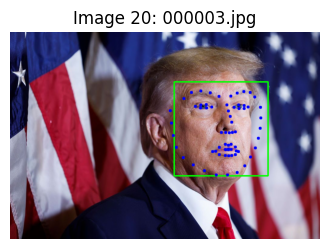

In [5]:
import cv2
import dlib
import matplotlib.pyplot as plt
import os

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

image_dir = 'trump_images'
image_files = os.listdir(image_dir)

for i, image_file in enumerate(image_files, start=1):
    image_path = os.path.join(image_dir, image_file)
    image = cv2.imread(image_path)

    if image is None:
        print(f"Skipping {image_file}. Image not loaded.")
        continue

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)

    for face in faces:
        x1 = face.left() 
        y1 = face.top()  
        x2 = face.right()
        y2 = face.bottom()
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 4)

        landmarks = predictor(gray, face)
        for n in range(0, 68):
            x = landmarks.part(n).x
            y = landmarks.part(n).y
            cv2.circle(image, (x, y), 5, (255, 0, 0), -1) 

    plt.figure(figsize=(4, 4))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Image {i}: {image_file}")
    plt.show()
